## Matplotlib tutorial

Matplotlib is a popular python visualisation library. It works really well with other datascience tools like numpy and pandas.

[matplotlib homepage](https://matplotlib.org/)

Lets start off by importing our libraries and loading in our dataset



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# getting the csv file from github and reading that into a pandas dataframe
fulldata = pd.read_csv("https://raw.githubusercontent.com/naxxatra/matplotlib-tutorial/main/states_land_use_pattern.csv",sep=",")
fulldata.head(8)

,States/UTs,Category,Total geographical area,Reporting area for land utilization,Forests,Not available for cultivation,Permanent pastures and other grazing lands,Land under miscellaneous tree crops & groves,Culturable wasteland,Fallow lands other than current fallows,Current fallows,Net area sown
0,Andhra Pradesh,Area,27507.0,27505,6210.00,4781.00,602.00,320.00,695.00,1583.00,3166.00,10147.00
1,Andhra Pradesh,Percentage to Geographical Area,NaN,100,22.58,17.38,2.19,1.16,2.53,5.76,11.51,36.89
2,Arunachal Pradesh,Area,8374.0,5659,5154.00,65.00,18.00,37.00,67.00,73.00,37.00,209.00
3,Arunachal Pradesh,Percentage to Geographical Area,NaN,100,91.08,1.15,0.32,0.65,1.18,1.29,0.65,3.69
4,Assam,Area,7844.0,7850,1954.00,2512.00,160.00,209.00,77.00,60.00,127.00,2753.00
5,Assam,Percentage to Geographical Area,NaN,100,24.89,32.00,2.04,2.66,0.98,0.76,1.62,35.07
6,Bihar,Area,9416.0,9360,622.00,2083.00,17.00,240.00,46.00,129.00,666.00,5556.00
7,Bihar,Percentage to Geographical Area,NaN,100,6.65,22.25,0.18,2.56,0.49,1.38,7.12,59.36


Let's Filter our data to get only a part of it

In [2]:
df = fulldata[fulldata["Category"] == "Area"]
df.head()

,States/UTs,Category,Total geographical area,Reporting area for land utilization,Forests,Not available for cultivation,Permanent pastures and other grazing lands,Land under miscellaneous tree crops & groves,Culturable wasteland,Fallow lands other than current fallows,Current fallows,Net area sown
0,Andhra Pradesh,Area,27507.0,27505,6210.0,4781.0,602.0,320.0,695.0,1583.0,3166.0,10147.0
2,Arunachal Pradesh,Area,8374.0,5659,5154.0,65.0,18.0,37.0,67.0,73.0,37.0,209.0
4,Assam,Area,7844.0,7850,1954.0,2512.0,160.0,209.0,77.0,60.0,127.0,2753.0
6,Bihar,Area,9416.0,9360,622.0,2083.0,17.0,240.0,46.0,129.0,666.0,5556.0
8,Chhattisgarh,Area,13519.0,13790,6355.0,996.0,857.0,1.0,350.0,238.0,271.0,4772.0


## Scatter plots

The simplest of plots

---

Lets plot each of our states and their areas in a simple plot



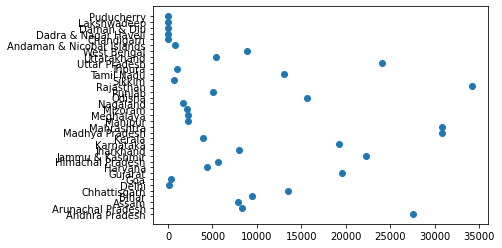

In [3]:
plt.scatter(df["Total geographical area"],df["States/UTs"])

Here we have 

- Names of staes on the y-axis
- Their corresponding area on the x-axis

Lets look at the syntax

```python
plt.scatter(df["Total geographical area"],df["States/UTs"])
```

- `plt` is the library
- `scatter` is the function we're calling
- `df["Total geographical area"]` and `df["States/UTs"]` are the `x` and `y` axes


There are a few problems with the graph at first glance

- The size of the graph is too small
- Scatter plots are not useful in representing this type of data
- The information is not easily decipherable
- its hard to understand which dot corresponds to which state
- Adding gridlines might help us

Lets try to address these problems
enter

## Barcharts

Let's try to represent the same data as a bar chart

<BarContainer object of 35 artists>

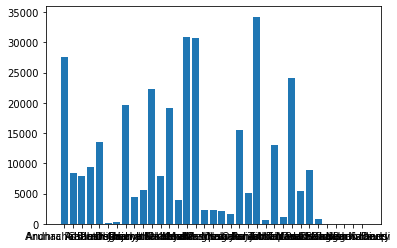

In [4]:
plt.bar(df["States/UTs"],df["Total geographical area"])

This looks better than the previous graph, but there are a few issues with this one

- The labels/states overlap each other
- size is too small


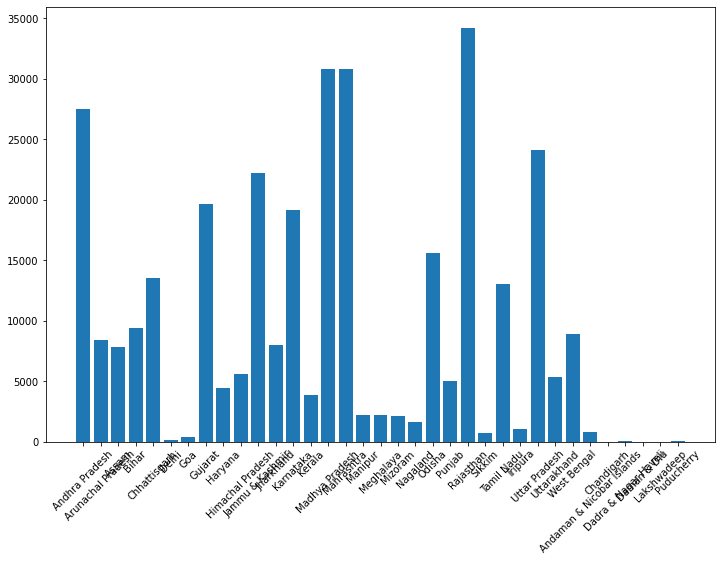

In [5]:
plt.figure(figsize=(12,8))                                  #set the figure size in inches (12 inches wide and 8 inches tall)
plt.bar(df["States/UTs"],df["Total geographical area"])
plt.xticks(rotation=45)                                     # Rotate the labels/ticks by 45 degrees
plt.show()                                                  # show the plot
plt.close()                                                 # close the figure object after showing it to conserve memory

This look much better than our first chart but there are still a few things missing here.

- the labels are mis-aligned
- there are no labels for the axes,
- addition of gridlines can make this look better

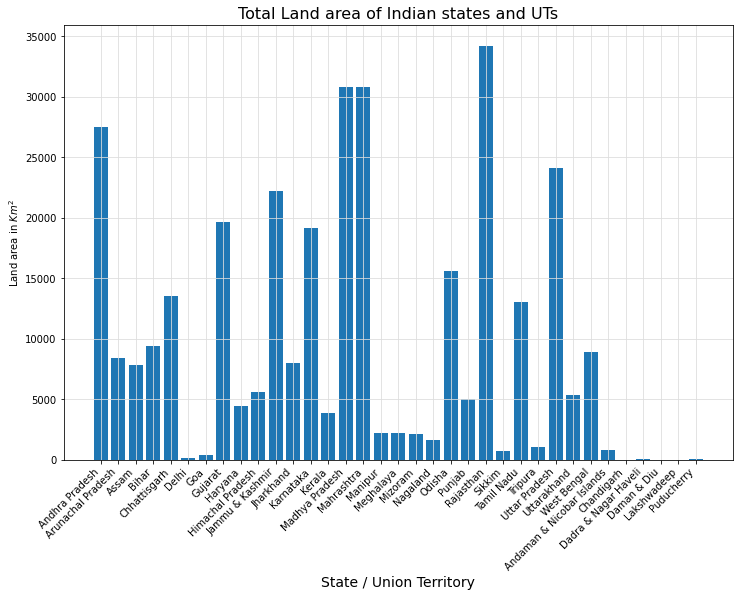

In [6]:
plt.figure(figsize=(12,8))                                  
plt.grid(True,color="#dddddd") # adding grid

plt.bar(df["States/UTs"],df["Total geographical area"])
plt.xticks(rotation=45, ha="right")  # Rotate the labels/ticks by 45 degrees and set horizontal alignment of text

plt.title("Total Land area of Indian states and UTs", fontsize=16)
plt.xlabel("State / Union Territory", fontsize=14)
plt.ylabel("Land area in $Km^{2}$") # Here we are using LaTeX syntax $Km^{2}$ to get 'km' superscript '2'

plt.show()
plt.close()

## In-built styles

Matplot lib comes with a lot of themes and styles inbuilt

to view the available styles we can use

```python
print(plt.style.available)
```

```python
['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
```

lets try using the `seaborn` style for our chart

> We can also customise the styles to our liking using `rcParams` checkout more
> details [here](https://matplotlib.org/stable/tutorials/introductory/customizing.html)


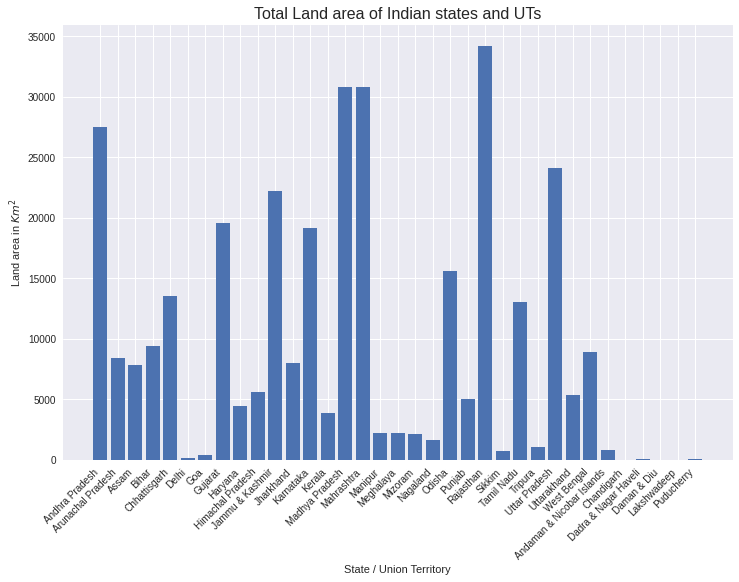

In [7]:
plt.figure(figsize=(12,8))                                  
plt.style.use("seaborn") # Try changing the style here.
## This is no longer required as seaborn comes with grid plt.grid(True,color="#dddddd") # adding grid

plt.bar(df["States/UTs"],df["Total geographical area"])
plt.xticks(rotation=45, ha="right")  # Rotate the labels/ticks by 45 degrees and set horizontal alignment of text

plt.title("Total Land area of Indian states and UTs", fontsize=16)
plt.xlabel("State / Union Territory")
plt.ylabel("Land area in $Km^{2}$")

plt.show()
plt.close()

## Pie charts

Pie charts are another good way to represent this kind of data
lets try making a basic `pie` chart using the `plt.pie` library

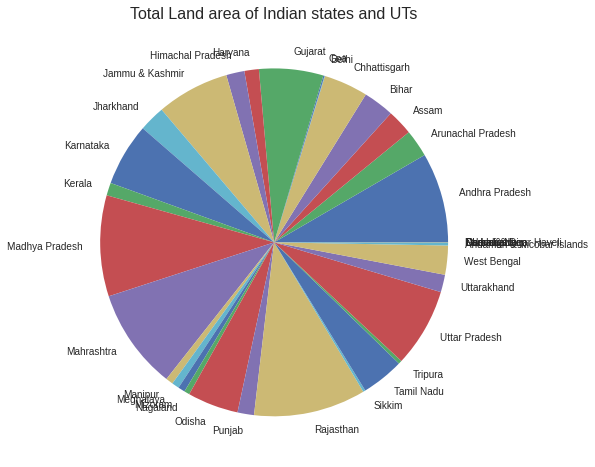

In [8]:
plt.figure(figsize=(12,8))                                  
plt.style.use("seaborn")

plt.pie(df["Total geographical area"], labels=df["States/UTs"])

plt.title("Total Land area of Indian states and UTs", fontsize=16)


plt.show()
plt.close()

Here again we can see a bunch of problems

- Overlapping text
- Lack of percentages / context
- We can also try to sort our data and graph the major states and add an extra `others` to show smaller states

In [9]:
df = df.sort_values('Total geographical area', ascending=False) # sort the values by area

df2 = df[:20].copy() # copy the top 20 into another dataframe
#others
others = df[20:].sum() # sum the bottom 20 into one single row
others["States/UTs"] = "Others"
others["Category"] = "Area"

# combine top 20 with others
df2 = pd.concat([df2, others.to_frame().T])

In [10]:
df2

,States/UTs,Category,Total geographical area,Reporting area for land utilization,Forests,Not available for cultivation,Permanent pastures and other grazing lands,Land under miscellaneous tree crops & groves,Culturable wasteland,Fallow lands other than current fallows,Current fallows,Net area sown
44,Rajasthan,Area,34224,34265,2698,4262,1706,20,4611,2265,1939,16764
28,Madhya Pradesh,Area,30825,30756,8699,3398,1348,19,1177,612,769,14735
30,Mahrashtra,Area,30771,30758,5214,3131,1252,249,914,1199,1325,17475
0,Andhra Pradesh,Area,27507,27505,6210,4781,602,320,695,1583,3166,10147
52,Uttar Pradesh,Area,24093,24201,1654,3215,65,376,439,550,1270,16633
20,Jammu & Kashmir,Area,22224,3781,2023,582,128,72,146,16,74,742
14,Gujarat,Area,19602,18868,1854,3752,850,4,1977,11,568,9852
24,Karnataka,Area,19179,19050,3072,2151,934,292,416,515,1565,10105
40,Odisha,Area,15571,15571,5813,1842,443,482,392,434,426,5739
8,Chhattisgarh,Area,13519,13790,6355,996,857,1,350,238,271,4772


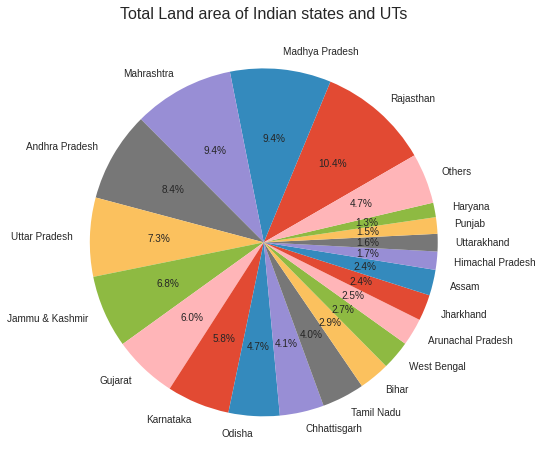

In [11]:
plt.figure(figsize=(12,8))                                  
plt.style.use("ggplot") 

plt.pie(df2["Total geographical area"], labels=df2["States/UTs"], startangle=30, autopct='%1.1f%%')

plt.title("Total Land area of Indian states and UTs", fontsize=16)


plt.show()
plt.close()


Now we have a basic idea of what can be done with simple bar charts and pie charts lets take a deeper look at some more advanced charts

## Stacked bar charts

Let us look at the total land area and the the forest area in the same graph

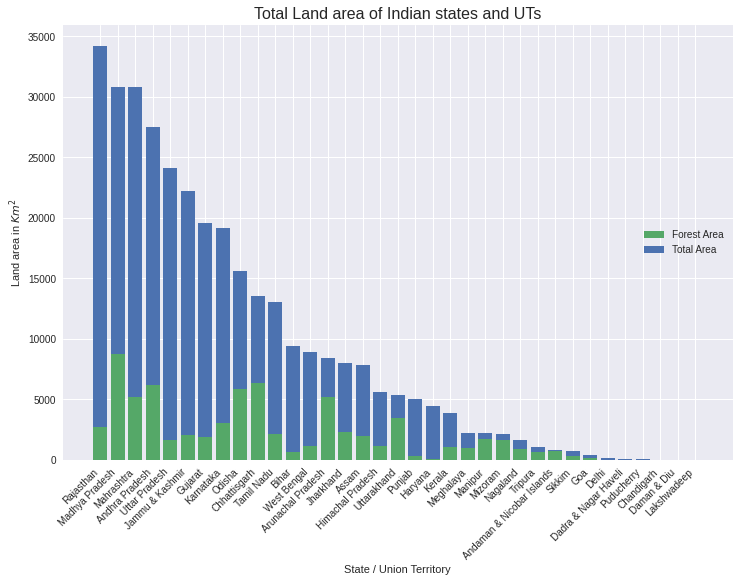

In [12]:
plt.figure(figsize=(12,8))                                  
plt.style.use("seaborn") # Try changing the style here.
## This is no longer required as seaborn comes with grid plt.grid(True,color="#dddddd") # adding grid

plt.bar(df["States/UTs"], df["Forests"], color="C1", label="Forest Area")
plt.bar(df["States/UTs"], df["Total geographical area"]-df["Forests"], bottom=df["Forests"], color="C0", label="Total Area")
plt.xticks(rotation=45, ha="right")  # Rotate the labels/ticks by 45 degrees and set horizontal alignment of text

plt.title("Total Land area of Indian states and UTs", fontsize=16)
plt.xlabel("State / Union Territory")
plt.ylabel("Land area in $Km^{2}$")

plt.legend(loc="right")

plt.show()
plt.close()

## Stacked bar as a percentage

Lets revisit our original dataset and extract the percentage-wise data from it




In [13]:
df = fulldata[fulldata["Category"] == "Percentage to Geographical Area"]
df.head()

,States/UTs,Category,Total geographical area,Reporting area for land utilization,Forests,Not available for cultivation,Permanent pastures and other grazing lands,Land under miscellaneous tree crops & groves,Culturable wasteland,Fallow lands other than current fallows,Current fallows,Net area sown
1,Andhra Pradesh,Percentage to Geographical Area,NaN,100,22.58,17.38,2.19,1.16,2.53,5.76,11.51,36.89
3,Arunachal Pradesh,Percentage to Geographical Area,NaN,100,91.08,1.15,0.32,0.65,1.18,1.29,0.65,3.69
5,Assam,Percentage to Geographical Area,NaN,100,24.89,32.00,2.04,2.66,0.98,0.76,1.62,35.07
7,Bihar,Percentage to Geographical Area,NaN,100,6.65,22.25,0.18,2.56,0.49,1.38,7.12,59.36
9,Chhattisgarh,Percentage to Geographical Area,NaN,100,46.08,7.22,6.21,0.01,2.54,1.73,1.97,34.24


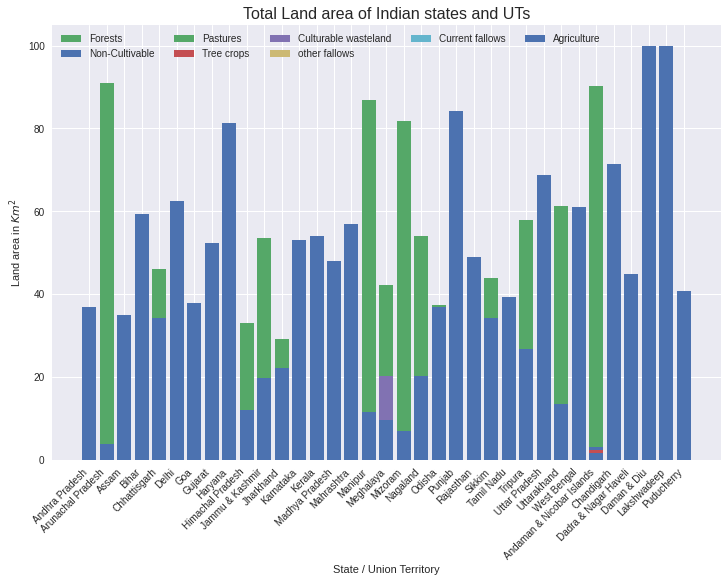

In [14]:
plt.figure(figsize=(12,8))                                  
plt.style.use("seaborn") # Try changing the style here.
## This is no longer required as seaborn comes with grid plt.grid(True,color="#dddddd") # adding grid

plt.bar(df["States/UTs"], df["Forests"], color="C1", label="Forests")
plt.bar(df["States/UTs"], df["Not available for cultivation"], label="Non-Cultivable")
plt.bar(df["States/UTs"], df["Permanent pastures and other grazing lands"], label="Pastures")
plt.bar(df["States/UTs"], df["Land under miscellaneous tree crops & groves"], label="Tree crops")
plt.bar(df["States/UTs"], df["Culturable wasteland"], label="Culturable wasteland")
plt.bar(df["States/UTs"], df["Fallow lands other than current fallows"], label="other fallows")
plt.bar(df["States/UTs"], df["Current fallows"], label="Current fallows")
plt.bar(df["States/UTs"], df["Net area sown"], label="Agriculture")

plt.xticks(rotation=45, ha="right")  # Rotate the labels/ticks by 45 degrees and set horizontal alignment of text

plt.title("Total Land area of Indian states and UTs", fontsize=16)
plt.xlabel("State / Union Territory")
plt.ylabel("Land area in $Km^{2}$")

plt.legend(loc="best",ncol=5)

plt.show()
plt.close()

We can see a few problems here

- the graphs are not stacked properly
- we have to give `bottom=` parameter for each stack
- the `bottom ` here is a combination of all the stacks below.

To do this we will have to loop over each column and add then to a bottom stack

```python
plt.bar(df["States/UTs"], df["Forests"], label="Forests", bottom=df["Not available for cultivation"]+df["Permanent pastures and other grazing lands"])
plt.bar(df["States/UTs"], df["Not available for cultivation"], label="Non-Cultivable", bottom=df["Permanent pastures and other grazing lands"])
```

Which can get quite cumbersome and verbose

fortunately we can use pandas and matplotlib together here


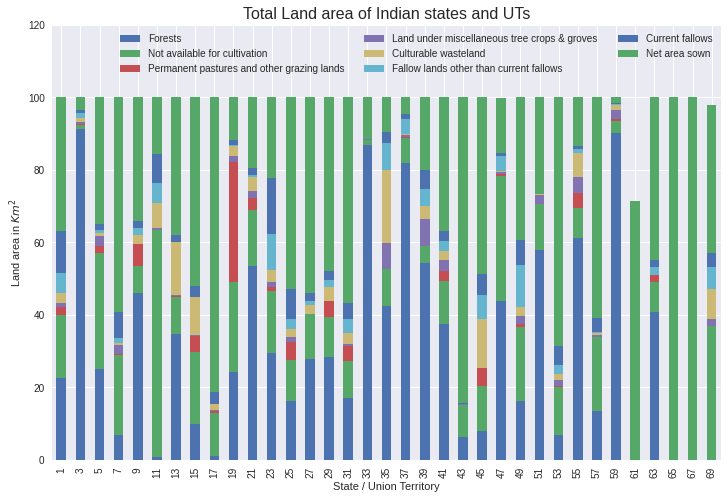

In [15]:
df2 = df[list(df.columns[4:])]


df2.plot(kind="bar",stacked=True,figsize=(12,8))

plt.title("Total Land area of Indian states and UTs", fontsize=16)
plt.xlabel("State / Union Territory")
plt.ylabel("Land area in $Km^{2}$")

plt.legend(loc="best",ncol=3)
plt.ylim(0,120)

plt.show()
plt.close()